In [2]:
# Importing essential libraries
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("heart_disease_risk_dataset_earlymed.csv")  
df.head()


,Chest_Pain,Shortness_of_Breath,Fatigue,Palpitations,Dizziness,Swelling,Pain_Arms_Jaw_Back,Cold_Sweats_Nausea,High_BP,High_Cholesterol,Diabetes,Smoking,Obesity,Sedentary_Lifestyle,Family_History,Chronic_Stress,Gender,Age,Heart_Risk
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,48.0,0.0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,46.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,66.0,0.0
3,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,69.0,0.0


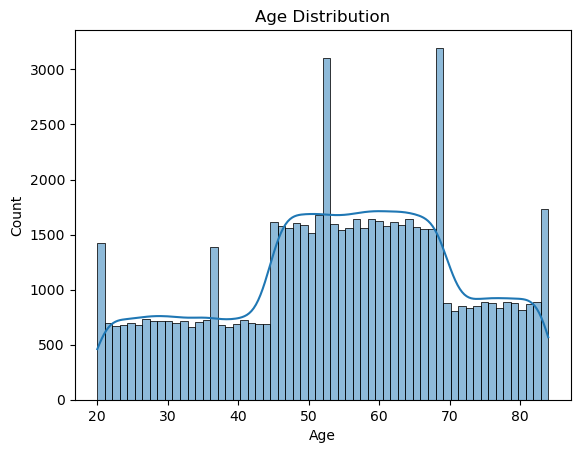

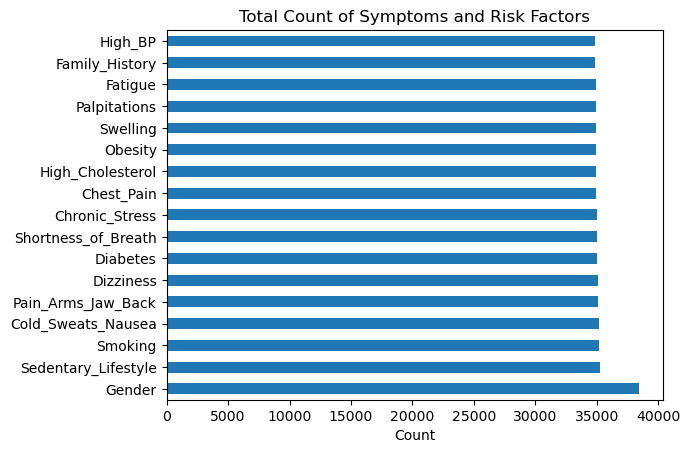

In [3]:
# I'm checking how balanced my target variable 'Heart_Risk' is
df['Heart_Risk'].value_counts()

# I want to see the age distribution of people in my dataset
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Now I'm checking how common each symptom or risk factor is
df.drop(columns=['Age', 'Heart_Risk']).sum().sort_values(ascending=False).plot(kind='barh')
plt.title('Total Count of Symptoms and Risk Factors')
plt.xlabel('Count')
plt.show()


* Symptom and Risk Count Bar Plot shows that all the symptoms and risk factors (except Gender) occur nearly equally—suggesting a  well-balanced dataset.

* Age Distribution Histogram shows a normal distribution across age groups, with spikes at certain ages—useful to understand which age groups are most represented.

In [5]:
#Preprocessing

# In this step, I define the features and target variable from the dataset.
# Since all features are already numerical and clean, I don’t need heavy preprocessing.

# Target variable: 'Heart_Risk'
# Feature variables: all other columns

X = df.drop('Heart_Risk', axis=1)  # Removing target column from features
y = df['Heart_Risk']               # Target variable

# Now I split the dataset into training and testing sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:
#Model Building & Training

# I’m using a Random Forest Classifier because it works well for classification problems and handles imbalance & noise efficiently.
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
# Model Evaluation

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predicting on the test set
y_pred = model.predict(X_test)

# Printing metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9920714285714286

Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      6998
         1.0       0.99      0.99      0.99      7002

    accuracy                           0.99     14000
   macro avg       0.99      0.99      0.99     14000
weighted avg       0.99      0.99      0.99     14000


Confusion Matrix:
 [[6946   52]
 [  59 6943]]



* Successfully trained a Random Forest Classifier with an accuracy of **99.21%** on the test data.

* The model demonstrates strong generalization ability with an excellent balance between precision and recall for both classes (0: No Heart Disease Risk, 1: At Risk).

 **Key Metrics:
     • Precision: 0.99
    • Recall:    0.99
    • F1-Score:  0.99
     • Support:   Balanced classes (~7000 samples each)

 
 ### This performance indicates the model is highly reliable for real-world heart disease risk prediction tasks.


In [8]:
# Save the model using joblib
import joblib

joblib.dump(model, 'heart_disease_model.pkl')


['heart_disease_model.pkl']